# De Prijs van Eten: Voedselprijzen door de tijd en continenten

Student names: Liam Boesten (15819965), Diaz Wiersma (15379078), Thomas Driesen (15831876), Kars Koopmanschap (15691241)

Team number: 19

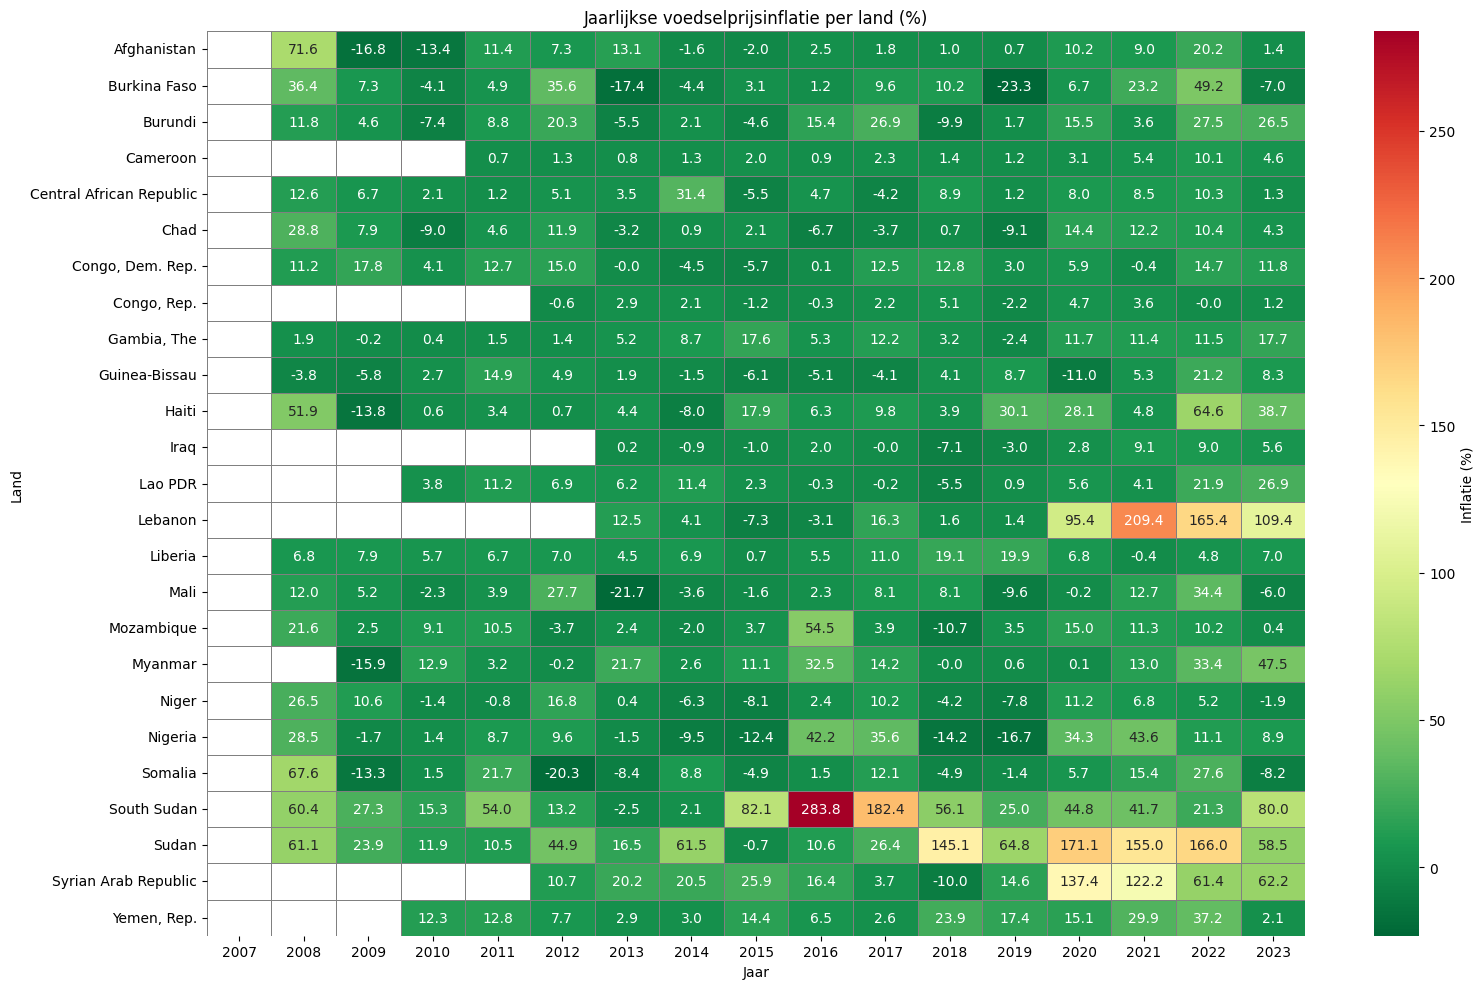

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data inladen
df = pd.read_csv("WLD_RTFP_country_2023-10-02.csv", parse_dates=['date'])

# Gemiddelde voedselprijs per rij berekenen
df['mean_price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

# Jaar uit datum halen
df['year'] = df['date'].dt.year

# Jaarlijkse gemiddelde voedselprijs per land berekenen
jaar_prijs = df.groupby(['country', 'year'])['mean_price'].mean().reset_index()

# Pivot zodat landen rijen zijn en jaren kolommen
pivot = jaar_prijs.pivot(index='country', columns='year', values='mean_price')

# NA's vullen met laatste beschikbare waarde (forward fill)
pivot_filled = pivot.ffill(axis=1)

# Procentuele verandering berekenen (inflatie) per land per jaar, fill_method=None om warning te voorkomen
inflatie = pivot_filled.pct_change(axis=1, fill_method=None) * 100

# Heatmap plotten
plt.figure(figsize=(16, 10))
sns.heatmap(
    inflatie,
    cmap='RdYlGn_r',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Inflatie (%)'},
    annot=True,
    fmt=".1f"
)
plt.title('Jaarlijkse voedselprijsinflatie per land (%)')
plt.xlabel('Jaar')
plt.ylabel('Land')
plt.tight_layout()
plt.show()


## Introduction

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh.

## Dataset and Preprocessing

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?

Quis autem vel eum iure reprehenderit qui in ea voluptate velit esse quam nihil molestiae consequatur, vel illum qui dolorem eum fugiat quo voluptas nulla pariatur? At vero eos et accusamus et iusto odio dignissimos ducimus qui blanditiis praesentium voluptatum deleniti atque corrupti quos dolores et quas molestias excepturi sint occaecati cupiditate non provident, similique sunt in culpa qui officia deserunt mollitia animi, id est laborum et dolorum fuga. Et harum quidem rerum facilis est et expedita distinctio.

## Perspectief nummer één

Stijgende voedselprijzen vormen een acute en groeiende crisis voor lage-inkomensgezinnen in Nederland. Deze gezinnen besteden vaak meer dan 30% van hun inkomen aan voedsel, waardoor zij disproportioneel zwaar worden getroffen door inflatie in de voedselprijzen (CBS, 2019). Dit zorgt niet alleen voor directe financiële stress, maar heeft ook ernstige gevolgen voor hun gezondheid, sociale positie en algemene levenskwaliteit. Overheden hebben daarom de plicht om snel en doeltreffend in te grijpen, om voedselzekerheid te waarborgen, ongelijkheid tegen te gaan en maatschappelijke escalatie te voorkomen.

### Argument één

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

SyntaxError: invalid syntax (1254959280.py, line 1)

> *Figure 1: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

At solmen va esser necessi far uniform grammatica, pronunciation e plu sommun paroles. Ma quande lingues coalesce, li grammatica del resultant lingue es plu simplic e regulari quam ti del coalescent lingues. Li nov lingua franca va esser plu simplic e regulari quam li existent Europan lingues. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante.

> *Figure 2: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante.

### The Second Argument of Your First Perspective

It va esser tam simplic quam Occidental in fact, it va esser Occidental. A un Angleso it va semblar un simplificat Angles, quam un skeptic Cambridge amico dit me que Occidental es. Li Europan lingues es membres del sam familie. Lor separat existentie es un myth. Por scientie, musica, sport etc, litot Europa usa li sam vocabular. Li lingues differe solmen in li grammatica, li pronunciation e li plu commun vocabules. Omnicos directe al desirabilite de un nov lingua franca: On refusa continuar payar custosi traductores. At solmen va esser necessi far uniform grammatica, pronunciation e plu sommun paroles.

> *Figure 3: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

Li Europan lingues es membres del sam familie. Lor separat existentie es un myth. Por scientie, musica, sport etc, litot Europa usa li sam vocabular. Li lingues differe solmen in li grammatica, li pronunciation e li plu commun vocabules. Omnicos directe al desirabilite de un nov lingua franca: On refusa continuar payar custosi traductores.

## Perspectief nummer twee

Markteconomieën zijn veerkrachtig en kunnen prijsfluctuaties van voedsel vaak opvangen door natuurlijke seizoenspatronen, internationale handel en marktmechanismen. Ingrijpende overheidsinterventies in voedselprijzen kunnen marktverstoringen veroorzaken en leiden tot inefficiënties op de lange termijn, waardoor uiteindelijk ook consumenten en producenten worden geschaad.

### The First Argument of Your Second Perspective

Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc.

> *Figure 4: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

Neque porro quisquam est, qui dolorem ipsum quia dolor sit amet, consectetur, adipisci velit, sed quia non numquam eius modi tempora incidunt ut labore et dolore magnam aliquam quaerat voluptatem. Ut enim ad minima veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur?

### The Second Argument of Your Second Perspective

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

> *Figure 5: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

> *Figure 6: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

## Reflection

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## Work Distribution

Curabitur non lacus ex. Maecenas at massa ultricies justo venenatis condimentum sed et eros. Ut vitae iaculis massa. Aenean vitae sagittis nibh. Aliquam pharetra dui suscipit purus dictum rutrum. Donec ultricies odio quis porttitor aliquet. Fusce sed nisl non velit rutrum commodo nec sed magna. Morbi non volutpat mi, cursus pulvinar dolor.

Nam sit amet volutpat sapien. Aenean eu mattis neque. Maecenas eget libero consequat, condimentum nulla luctus, fermentum lectus. Donec at enim sit amet dolor vestibulum faucibus. Vestibulum velit elit, faucibus ut mi sit amet, mollis rutrum eros. Ut ut lacinia ante, eu placerat ligula. Fusce quis convallis purus. Maecenas eget fringilla quam.

Proin ac sapien et lectus tempor dignissim a at arcu. Donec placerat aliquet odio, vel aliquam nibh tempus vel. Pellentesque non velit iaculis, porta metus sed, dictum augue. Aenean tempus gravida ullamcorper. Proin cursus fringilla turpis. Integer id lectus dignissim, ultrices metus vel, dictum quam. Suspendisse augue ligula, vestibulum ac nulla a, porta pharetra leo. Integer et pharetra lacus, in porttitor mauris. Cras sodales metus sit amet enim rhoncus sodales. Etiam orci enim, tincidunt eget arcu vel, gravida scelerisque lacus.

## References

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022

## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*